In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [9]:
df=pd.read_csv('tips.csv')

In [8]:
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,NaN,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.isnull().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  205 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [ ]:
df.isna().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [ ]:
df.isnull().mean()

Unnamed: 0    0.000000
total_bill    0.159836
tip           0.000000
sex           0.000000
smoker        0.000000
day           0.000000
time          0.000000
size          0.000000
dtype: float64

In [ ]:
def impute_nan(df, variable, method):
    df[variable] = df[variable].fillna(method)

In [ ]:
method = df.total_bill.median()

In [ ]:
impute_nan(df,'total_bill',method)

In [12]:
df.head(10)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,NaN,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


In [ ]:
# df['total_bill'].replace(df['total_bill_median'],inplace=True)

In [ ]:
# df.drop('total_bill_median',axis=1).head(5)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
#Q2 Handle the categorical data in the tips dataset with the relevant approaches such as label-encoding, one hot encoding, ordinal encoding.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [ ]:
ohe=OneHotEncoder()

In [ ]:
ohe.fit_transform(df[['sex','smoker','day','time']]).toarray()

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [ ]:
#Q3 Perform feature scaling techniques such as min-max normalization, standardization, z-score, on the tips dataset.

In [16]:
from sklearn.preprocessing import MinMaxScaler
mi = MinMaxScaler()

In [17]:
df_minmax = mi.fit_transform(df[['total_bill','tip']])

In [18]:
dff=pd.DataFrame(df_minmax,columns=['total_bill','tip'])

In [19]:
dff.sample(5)

,total_bill,tip
234,0.260997,0.222222
9,0.245287,0.247778
106,0.364893,0.340000
16,NaN,0.074444
99,NaN,0.055556


(array([ 2., 10.,  5., 35., 49., 28., 24., 14., 12., 10.,  4.,  5.,  2.,
         1.,  4.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

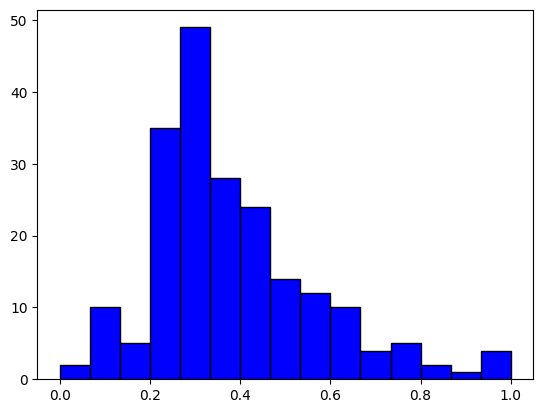

In [22]:
import matplotlib.pyplot as plt
plt.hist(dff['total_bill'], bins = 15,color='blue',edgecolor='black')

In [23]:
#standardization

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
s = StandardScaler()

In [26]:
df_scaled = s.fit_transform(df[['total_bill','tip']])

In [27]:
df_scaled

array([[-4.94023960e-01, -1.43994695e+00],
       [            nan, -9.69205340e-01],
       [-3.95874271e-02,  3.63355539e-01],
       [ 2.62239822e-01,  2.25754144e-01],
       [ 3.65109784e-01,  4.43019505e-01],
       [ 4.44240523e-01,  1.23965916e+00],
       [-1.42324493e+00, -7.22971264e-01],
       [ 6.23980346e-01,  8.81527488e-02],
       [-7.14459592e-01, -7.51939979e-01],
       [-7.43851009e-01,  1.67816714e-01],
       [            nan, -9.32994446e-01],
       [ 1.57128834e+00,  1.44968234e+00],
       [-6.71502904e-01, -1.03438495e+00],
       [-3.31240724e-01,  1.24660453e-03],
       [-7.38198813e-01,  1.57309619e-02],
       [ 2.48476037e-02,  6.67527044e-01],
       [            nan, -9.61963161e-01],
       [-5.73154700e-01,  5.15441291e-01],
       [-4.96284838e-01,  3.63355539e-01],
       [-8.02832360e-02,  2.54722859e-01],
       [-3.88893120e-01,  7.83401903e-01],
       [-1.20979045e-01, -1.79807863e-01],
       [-6.31937535e-01, -5.56401155e-01],
       [ 2.

In [32]:
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,NaN,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
zscore=(dff['total_bill']-dff['total_bill'].mean())/dff['total_bill'].std()

In [35]:
zscore

0     -0.492818
1           NaN
2     -0.039491
3      0.261599
4      0.364218
         ...   
239    0.864907
240    0.656287
241    0.147704
242   -0.399220
243   -0.290963
Name: total_bill, Length: 244, dtype: float64

In [36]:
#Q4 Create a new feature representing the average tip percentage for each dining party size.

In [37]:
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,NaN,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
df['avg_tip_per_size'] = df.groupby('size')['tip'].transform('mean')

In [39]:
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,avg_tip_per_size
0,0,16.99,1.01,Female,No,Sun,Dinner,2,2.582308
1,1,NaN,1.66,Male,No,Sun,Dinner,3,3.393158
2,2,21.01,3.50,Male,No,Sun,Dinner,3,3.393158
3,3,23.68,3.31,Male,No,Sun,Dinner,2,2.582308
4,4,24.59,3.61,Female,No,Sun,Dinner,4,4.135405


In [40]:
#Q5 Create a new feature based on total bill and tips if total bill is greater than 10$ and tips is greater than 3$ mark as Highest-bills-with-tips otherwise Normal-bills

In [41]:
def categorize_bills(total_bill, tip):
    if total_bill > 10 and tip > 3:
        return 'Highest-bills-with-tips'
    else:
        return 'Normal-bills'

df['bill_category'] = df.apply(lambda row: categorize_bills(row['total_bill'], row['tip']), axis=1)

In [42]:
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,avg_tip_per_size,bill_category
0,0,16.99,1.01,Female,No,Sun,Dinner,2,2.582308,Normal-bills
1,1,NaN,1.66,Male,No,Sun,Dinner,3,3.393158,Normal-bills
2,2,21.01,3.50,Male,No,Sun,Dinner,3,3.393158,Highest-bills-with-tips
3,3,23.68,3.31,Male,No,Sun,Dinner,2,2.582308,Highest-bills-with-tips
4,4,24.59,3.61,Female,No,Sun,Dinner,4,4.135405,Highest-bills-with-tips
